## 8.3 합성곱 신경망의 시각화

목표: 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해하기

### 가중치 시각화

합성곱 층은 여러개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다.

일반적으로 절편은 시각적으로 의미가 있지 않다. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

In [2]:
# 직전 장에서 만든 모델 불러오기
from tensorflow import keras

model = keras.models.load_model("best-cnn-model.h5")

Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2025-04-26 18:15:19.956275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-26 18:15:19.956713: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.layers

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03726358 0.24930876


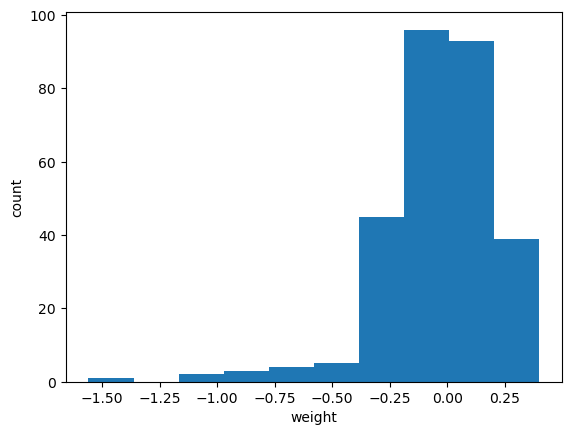

In [7]:
# 가중치 분포 확인하기
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

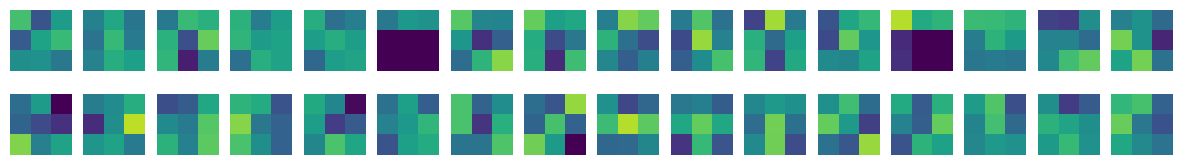

In [11]:
# 32개 커널을 16개씩 두 줄씩 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")

plt.show()

In [12]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [13]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0061153513 0.08262221


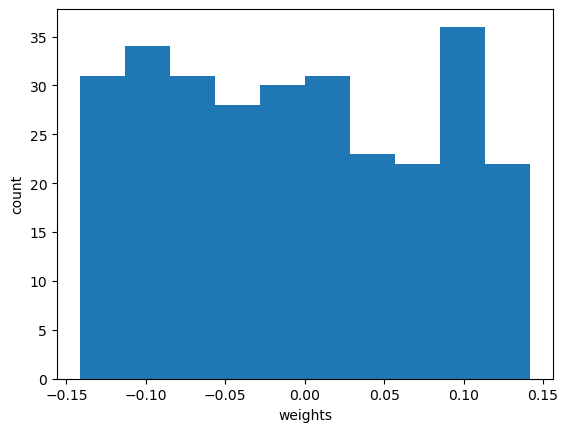

In [15]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

위 히스토그램은 학습 결과로 나온 가중치와 다르게 균등하게 분포하는 것을 볼 수 있다. 이는 학습전 커널의 가중치는 신경망 가중치 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

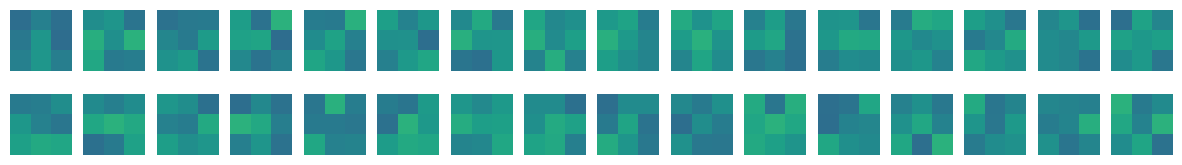

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis("off")

plt.show()

### 함수형 API

Sequential 클래스는 층을 차례대로 쌓은 모델을 만든다. 딥러닝에서는 좀 더 복잡한 모델이 많이 있다.

예로, 입력이 2개 일 수 도 있고 출력이 2개일 수도 있다. 이런 경우는 Squential 클래스를 사용하기 어렵다. 대신 함수형 API를 사용한다.

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### 특성 맵 시각화

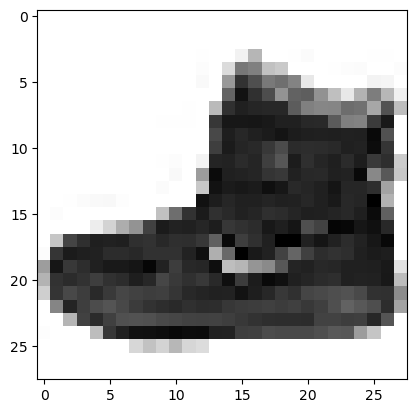

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.
feature_maps = conv_acti.predict(inputs)

2025-04-26 18:51:12.016186: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-04-26 18:51:12.047177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 294ms/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


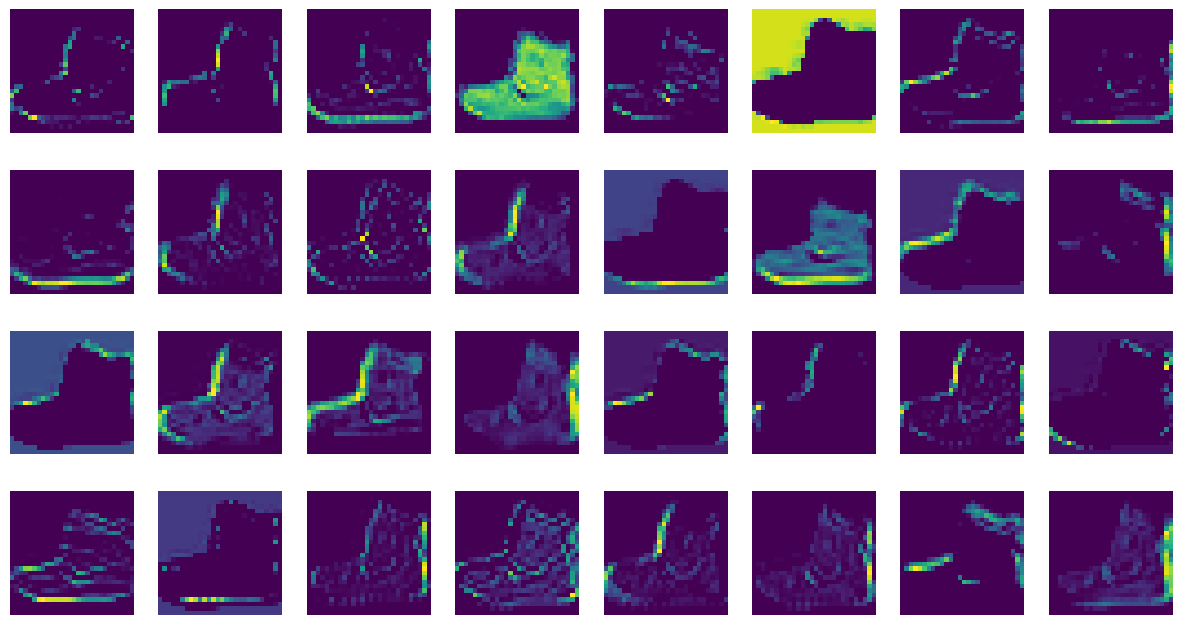

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")
plt.show()

In [23]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [24]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 158ms/step


2025-04-26 19:00:34.129321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


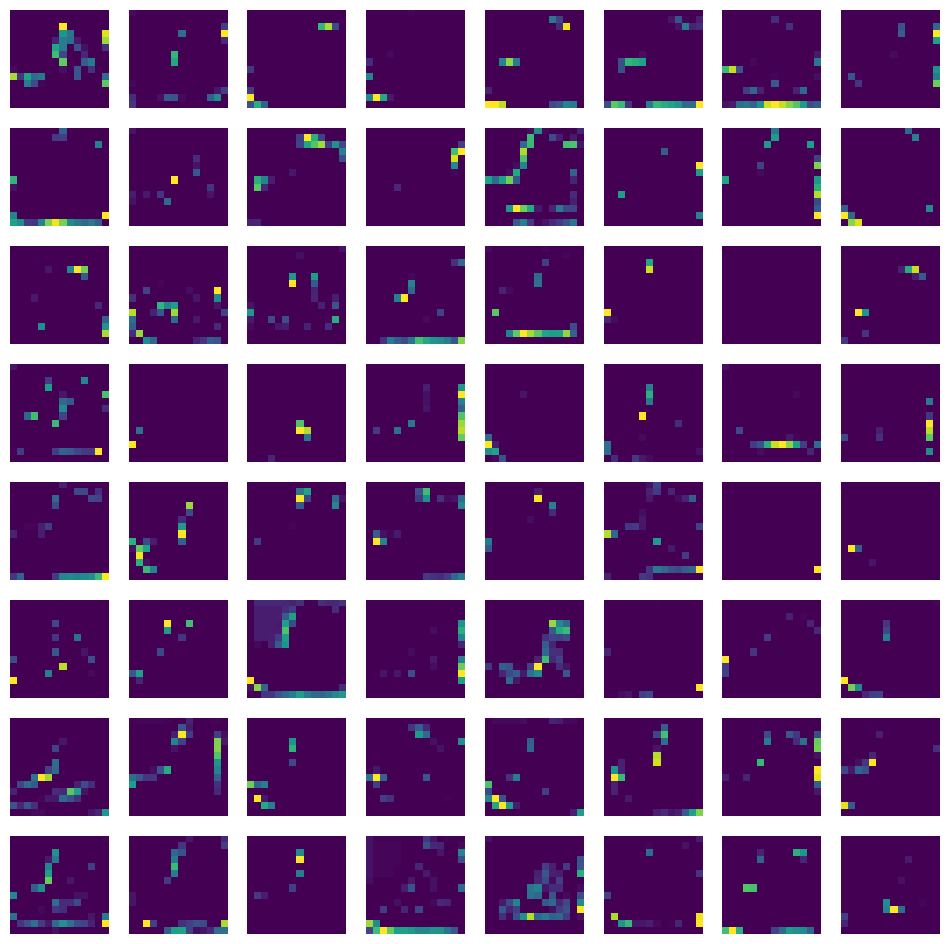

In [26]:
fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")
plt.show()